In [2]:
! cp -r /content/drive/My\ Drive/machine_learning/ /content

In [3]:
import os
os.chdir("/content/machine_learning")

In [4]:
import cnn_models
import crnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset

plt.style.use('default')
drive_dir = "/content/drive/My Drive/machine_learning"
pth_dir = f"{drive_dir}/pths"
loss_dir = f"{drive_dir}/losses"

In [5]:
train_dataset = FeatureDataset("cqt", "train")
validate_dataset = FeatureDataset("cqt", "validate")
test_dataset = FeatureDataset("cqt", "test")

criterion = nn.CrossEntropyLoss()

In [ ]:
model = crnn_models.CQTCRNN(crnn_models.CQTCNNSquareForCRNN(), 256, rnn_type="gru", bidirectional=True, hidden_size=128).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [ ]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir, has_hidden=True)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_gru_bi_cqt/epoch_0.pth
0min 43.2s, EPOCH 5/50, Loss: 347.58, Total time: 43.169, Transfer time: 3.342, Train time: 29.531
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_gru_bi_cqt/epoch_5.pth
1min 26.6s, EPOCH 10/50, Loss: 323.49, Total time: 43.396, Transfer time: 3.389, Train time: 29.541
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_gru_bi_cqt/epoch_10.pth
2min 9.8s, EPOCH 15/50, Loss: 299.89, Total time: 43.152, Transfer time: 3.336, Train time: 29.529
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_gru_bi_cqt/epoch_15.pth
2min 53.1s, EPOCH 20/50, Loss: 281.36, Total time: 43.294, Transfer time: 3.365, Train time: 29.541
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_gru_bi_cqt/epoch_20.pth
3min 36.4s, EPOCH 25/50, Loss: 251.92, Total time: 43.296, Transfer time: 3.375, Train time: 29.532
Save

Evaluating pths for epochs:  0 (0min 5.1s), 5 (0min 10.2s), 10 (0min 15.5s), 15 (0min 20.6s), 20 (0min 25.8s), 25 (0min 30.9s), 30 (0min 36.2s), 35 (0min 41.3s), 40 (0min 46.5s), 45 (0min 51.7s), 50 (0min 56.9s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8839 at epoch 50
Maximum validate accuracy: 0.4825 at epoch 25
Maximum test accuracy: 0.4238 at epoch 35

AT EPOCH 35
Macro Test AUC: 0.7699, Accuracy: 0.4238

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7809, Accuracy of 0.67
 - Experimental: AUC of 0.7, Accuracy of 0.31
 - Folk: AUC of 0.7303, Accuracy of 0.08
 - Hip-Hop: AUC of 0.9446, Accuracy of 0.75
 - Instrumental: AUC of 0.8161, Accuracy of 0.44
 - International: AUC of 0.7295, Accuracy of 0.35
 - Pop: AUC of 0.562, Accuracy of 0.16
 - Rock: AUC of 0.8871, Accuracy of 0.63


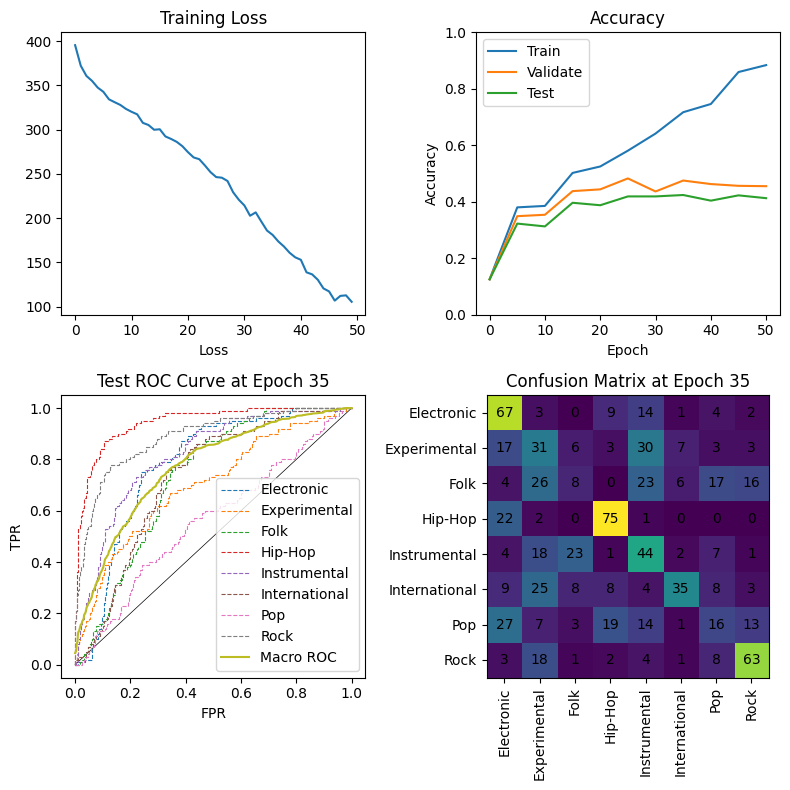

In [ ]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir, has_hidden=True)
ma.make_plots(loss_dir=loss_dir)

In [ ]:
model = crnn_models.CQTCRNNParallel(cnn_models.CQTCNNSquare(for_crnn=True), 256, rnn_type="gru", hidden_size=128).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [ ]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir, has_hidden=True)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_gru_cqt/epoch_0.pth
0min 32.4s, EPOCH 5/50, Loss: 329.44, Total time: 32.367, Transfer time: 3.543, Train time: 18.711
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_gru_cqt/epoch_5.pth
1min 4.9s, EPOCH 10/50, Loss: 305.77, Total time: 32.476, Transfer time: 3.569, Train time: 18.729
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_gru_cqt/epoch_10.pth
1min 37.3s, EPOCH 15/50, Loss: 281.27, Total time: 32.387, Transfer time: 3.541, Train time: 18.709
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_gru_cqt/epoch_15.pth
2min 9.7s, EPOCH 20/50, Loss: 260.19, Total time: 32.346, Transfer time: 3.552, Train time: 18.714
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_gru_cqt/epoch_20.pth
2min 42.1s, EPOCH 25/50, Loss: 237.75, Total time: 32.426, Transfer time: 3

Evaluating pths for epochs:  0 (0min 4.3s), 5 (0min 8.5s), 10 (0min 12.8s), 15 (0min 17.0s), 20 (0min 21.2s), 25 (0min 25.4s), 30 (0min 29.6s), 35 (0min 33.9s), 40 (0min 38.1s), 45 (0min 42.3s), 50 (0min 46.5s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8415 at epoch 50
Maximum validate accuracy: 0.495 at epoch 25
Maximum test accuracy: 0.4437 at epoch 40

AT EPOCH 40
Macro Test AUC: 0.778, Accuracy: 0.4437

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8323, Accuracy of 0.65
 - Experimental: AUC of 0.7364, Accuracy of 0.37
 - Folk: AUC of 0.7817, Accuracy of 0.27
 - Hip-Hop: AUC of 0.9347, Accuracy of 0.79
 - Instrumental: AUC of 0.7559, Accuracy of 0.17
 - International: AUC of 0.7501, Accuracy of 0.47
 - Pop: AUC of 0.5485, Accuracy of 0.39
 - Rock: AUC of 0.8761, Accuracy of 0.44


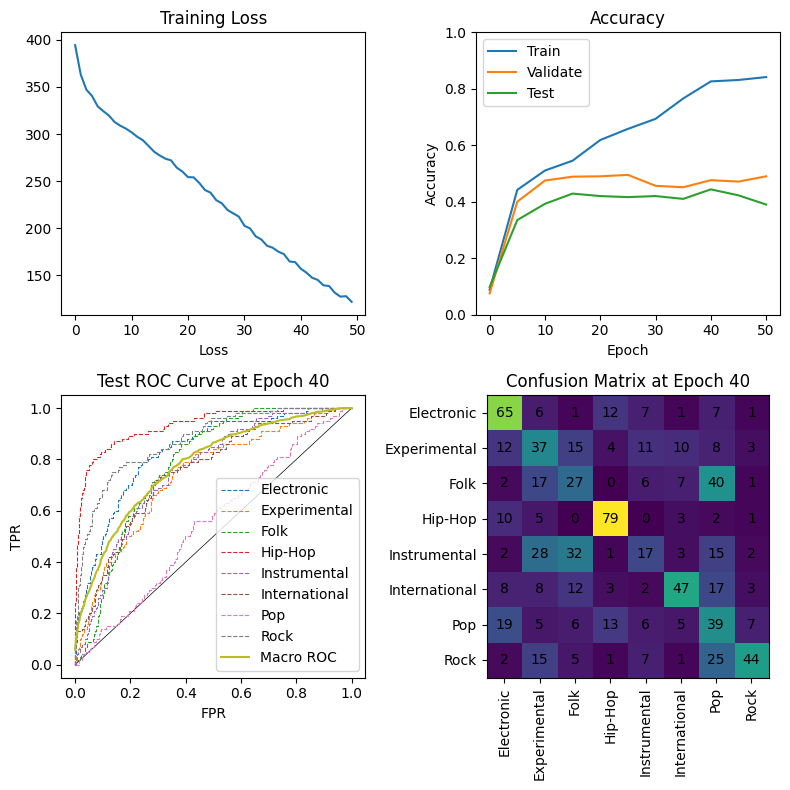

In [ ]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir, has_hidden=True)
ma.make_plots(loss_dir=loss_dir)

In [19]:
model = crnn_models.CQTCRNNParallel(cnn_models.CQTCNNFreq(for_crnn=True, conv_types=["densenet", "densenet", "densenet", "densenet"]), 512, rnn_type="lstm", bidirectional=True, hidden_size=128).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [20]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir, has_hidden=True)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_lstm_cqt/epoch_0.pth
4min 6.5s, EPOCH 5/50, Loss: 336.09, Total time: 246.405, Transfer time: 3.389, Train time: 229.713
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_lstm_cqt/epoch_5.pth
8min 10.4s, EPOCH 10/50, Loss: 304.7, Total time: 243.842, Transfer time: 2.742, Train time: 229.057
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_lstm_cqt/epoch_10.pth
12min 14.5s, EPOCH 15/50, Loss: 285.43, Total time: 244.043, Transfer time: 2.763, Train time: 229.157
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_lstm_cqt/epoch_15.pth
16min 18.5s, EPOCH 20/50, Loss: 267.57, Total time: 243.949, Transfer time: 2.735, Train time: 229.156
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_crnn_parallel_lstm_cqt/epoch_20.pth
20min 22.3s, EPOCH 25/50, Loss: 242.07, Total time: 243.774,

Evaluating pths for epochs:  0 (0min 20.3s), 5 (0min 40.6s), 10 (1min 0.9s), 15 (1min 21.3s), 20 (1min 41.7s), 25 (2min 2.0s), 30 (2min 22.3s), 35 (2min 42.6s), 40 (3min 3.0s), 45 (3min 23.3s), 50 (3min 43.5s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8641 at epoch 50
Maximum validate accuracy: 0.4875 at epoch 30
Maximum test accuracy: 0.4187 at epoch 15

AT EPOCH 15
Macro Test AUC: 0.7503, Accuracy: 0.4187

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7818, Accuracy of 0.53
 - Experimental: AUC of 0.698, Accuracy of 0.13
 - Folk: AUC of 0.7223, Accuracy of 0.28
 - Hip-Hop: AUC of 0.9337, Accuracy of 0.78
 - Instrumental: AUC of 0.7895, Accuracy of 0.36
 - International: AUC of 0.7573, Accuracy of 0.59
 - Pop: AUC of 0.4547, Accuracy of 0.14
 - Rock: AUC of 0.8565, Accuracy of 0.54


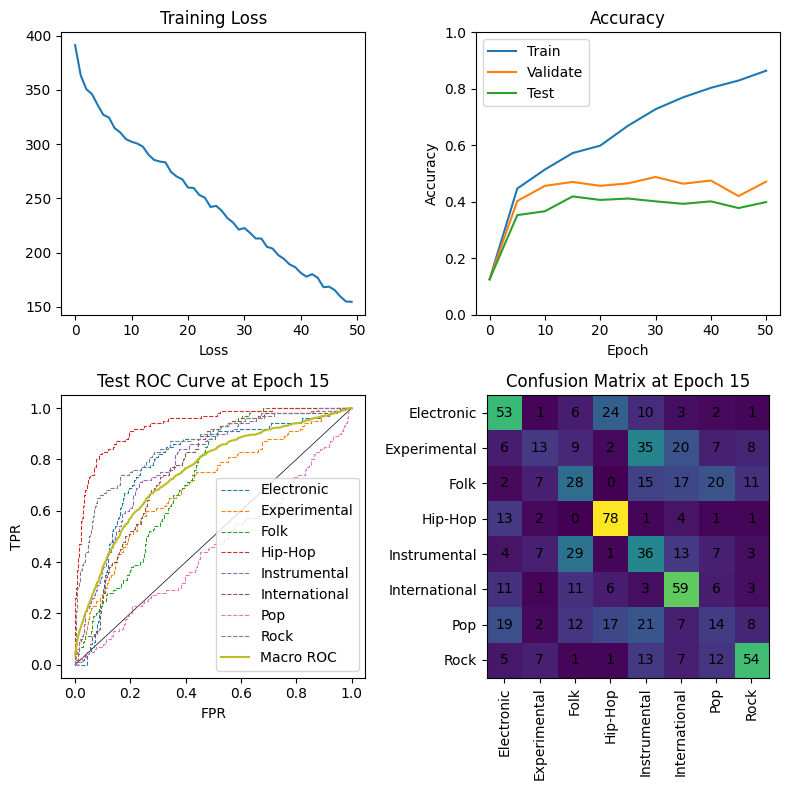

In [21]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir, has_hidden=True)
ma.make_plots(loss_dir=loss_dir)